In [1]:
import pandas as pd
import numpy as np
import os
#df = pd.read_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/embeddings/all/labels_with_embs.csv")
df = pd.read_csv("/vol/aimspace/users/sdm/Projects/WholeBodyRL/logs/checkpoints/mae_multi_recon_0.7/21-12-2024_00-19-47/embeddings_cls_correct.csv")
df_alcohol_smoking = pd.read_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/alcohol_smoking.csv")


In [35]:
df.columns

Index(['bmi', 'age', 'eid', 'sex', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5',
       ...
       'feature_1019', 'feature_1020', 'feature_1021', 'feature_1022',
       'feature_1023', 'feature_1024', 'alcohol_intake', 'smoking_status',
       'reducer_1', 'reducer_2'],
      dtype='object', length=1033)

In [34]:
df_healthy_age = pd.read_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/labels_healthy_age.csv")

In [37]:
df_healthy_age = df_healthy_age.merge(df.drop(columns=['bmi', 'age', 'sex']), on="eid", how="left")

In [40]:
# calculate nans in each column
df_healthy_age = df_healthy_age.drop(columns=["alcohol_intake", "smoking_status", "reducer_1", "reducer_2"])

In [ ]:
df

In [2]:
df = df.merge(df_alcohol_smoking, on='eid', how='left')

In [3]:
# find eids where age is not NaN
eids_age = df.loc[~df['age'].isnull()]['eid'].values
eids_bmi = df.loc[~df['bmi'].isnull()]['eid'].values
eids_sex = df.loc[~df['sex'].isnull()]['eid'].values
eids_smoking = df.loc[~df['smoking_status'].isnull()]['eid'].values
eids_alcohol = df.loc[~df['alcohol_intake'].isnull()]['eid'].values
len(eids_age), len(eids_bmi), len(eids_sex), len(eids_smoking), len(eids_alcohol)

(73094, 66333, 73094, 49119, 49119)

In [4]:
df_age = df.loc[df['eid'].isin(eids_age)]
df_bmi = df.loc[df['eid'].isin(eids_bmi)]
df_sex = df.loc[df['eid'].isin(eids_sex)]
df_smoking = df.loc[df['eid'].isin(eids_smoking)]
df_alcohol = df.loc[df['eid'].isin(eids_alcohol)]


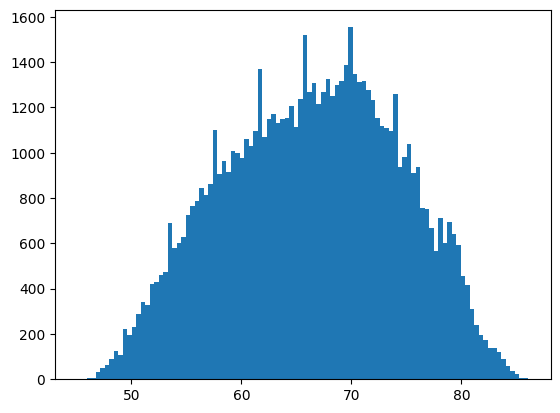

In [5]:
# histogram of age
import matplotlib.pyplot as plt
plt.hist(df_age["age"], bins=100)
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import normal
import umap.umap_ as umap


def dim_reduce(df, perplexity=30, reducer="tsne"):

# Extract embeddings from the dataframe
    embedding_cols = [col for col in df.columns if col.startswith("feature_")]
    embeddings = df[embedding_cols].values

    # Normalize the embeddings
    scaler = StandardScaler()
    normalized_embeddings = scaler.fit_transform(embeddings)
    normalized_embeddings = embeddings

    # Apply t-SNE
    if reducer == "tsne":
        reducer_algo = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    elif reducer == "umap":
        reducer_algo = umap.UMAP(n_components=2, random_state=42, n_neighbors=perplexity)
    results = reducer_algo.fit_transform(normalized_embeddings)

    # Add t-SNE results to the DataFrame
    df["reducer_1"] = results[:, 0]
    df["reducer_2"] = results[:, 1]
    return df
perplexity = 30
df = dim_reduce(df, perplexity, reducer="tsne")
#df_age_tsne = dim_reduce(df_age, perplexity, reducer="tsne")
#df_bmi_tsne = dim_reduce(df_bmi, perplexity, reducer="tsne")
#df_sex_tsne = dim_reduce(df_sex, perplexity, reducer="tsne")
#df_smoking_tsne = dim_reduce(df_smoking, 30, reducer="tsne")
#df_alcohol_tsne = dim_reduce(df_alcohol, 30, reducer="tsne")

#df_age_umap = dim_reduce(df_age, 30, reducer="umap")
#df_bmi_umap = dim_reduce(df_bmi, 30, reducer="umap")
#df_sex_umap = dim_reduce(df_sex, 30, reducer="umap")



#from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE with 3 components
#tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
#tsne_results_3d = tsne_3d.fit_transform(normalized_embeddings)

# Add 3D t-SNE results to the DataFrame
#df["tsne_1"] = tsne_results_3d[:, 0]
#df["tsne_2"] = tsne_results_3d[:, 1]
#df["tsne_3"] = tsne_results_3d[:, 2]





In [9]:
df_age = df.loc[df['eid'].isin(eids_age)]
df_bmi = df.loc[df['eid'].isin(eids_bmi)]
df_sex = df.loc[df['eid'].isin(eids_sex)]
df_smoking = df.loc[df['eid'].isin(eids_smoking)]
df_alcohol = df.loc[df['eid'].isin(eids_alcohol)]

In [10]:
df_smoking.head()

,bmi,age,eid,sex,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,alcohol_intake,smoking_status,reducer_1,reducer_2
0,30.8012,69.1,1000071,0.0,0.009295,-0.050158,0.106136,-0.074978,-0.014191,-0.011741,...,0.054865,0.046250,0.001940,-0.122577,0.029663,-0.008626,Three or four times a week,Never,12.144363,-65.192238
1,26.5036,75.0,1000109,0.0,0.008081,-0.048688,0.108506,-0.062822,-0.021515,-0.007106,...,0.043792,0.047429,-0.004594,-0.120720,0.028851,-0.009449,Three or four times a week,Previous,-15.447844,-88.373123
2,NaN,NaN,1000125,NaN,0.004932,-0.061935,0.082816,-0.072351,-0.002664,-0.011788,...,0.046699,0.017718,-0.004869,-0.097786,0.020660,-0.005567,Never,Never,-89.310493,16.464003
3,32.6204,58.7,1000180,1.0,0.013318,-0.043398,0.090517,-0.053843,-0.004366,-0.004750,...,0.040237,0.053968,-0.011152,-0.114236,0.029537,-0.012125,Daily or almost daily,Never,65.846313,50.965569
4,24.6337,73.0,1000191,1.0,0.003529,-0.065143,0.090277,-0.061435,-0.004244,-0.017204,...,0.065920,0.047568,-0.019216,-0.103217,0.028549,-0.014057,Once or twice a week,Never,-40.792553,37.460320


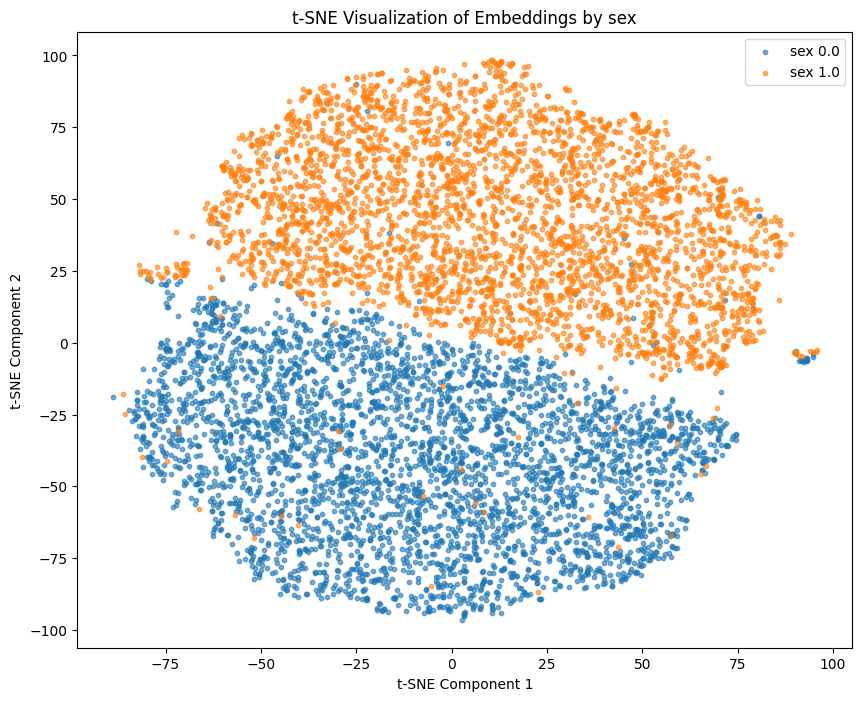

In [12]:
# Plot t-SNE results colored by sex
def visualize_tsne(df, target, vis_fraction=0.1, remove_groups=None):
    
    plt.figure(figsize=(10, 8))
    for group in df[target].unique():
        if remove_groups and group in remove_groups:
            continue
        subset = df[df[target] == group]
        # take only 10% of the data to make the plot clearer
        subset = subset.sample(frac=vis_fraction, random_state=42)
        plt.scatter(subset["reducer_1"], subset["reducer_2"], label=f"{target} {group}", alpha=0.6, s=10)

    plt.title(f"t-SNE Visualization of Embeddings by {target}") 
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend()
    plt.show()

visualize_tsne(df_sex, "sex", vis_fraction=0.1)
#visualize_tsne(df_smoking_tsne, "smoking_status", vis_fraction=0.99, remove_groups=["Prefer not to answer", "Previous"])

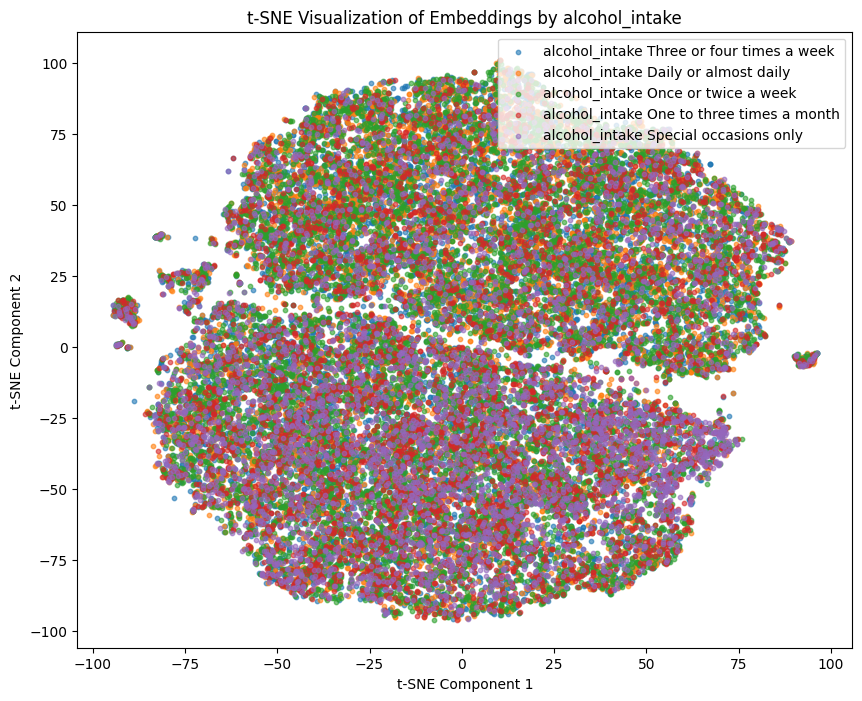

In [26]:
visualize_tsne(df_alcohol, "alcohol_intake", vis_fraction=0.9, remove_groups=["Prefer not to answer", "Never"])

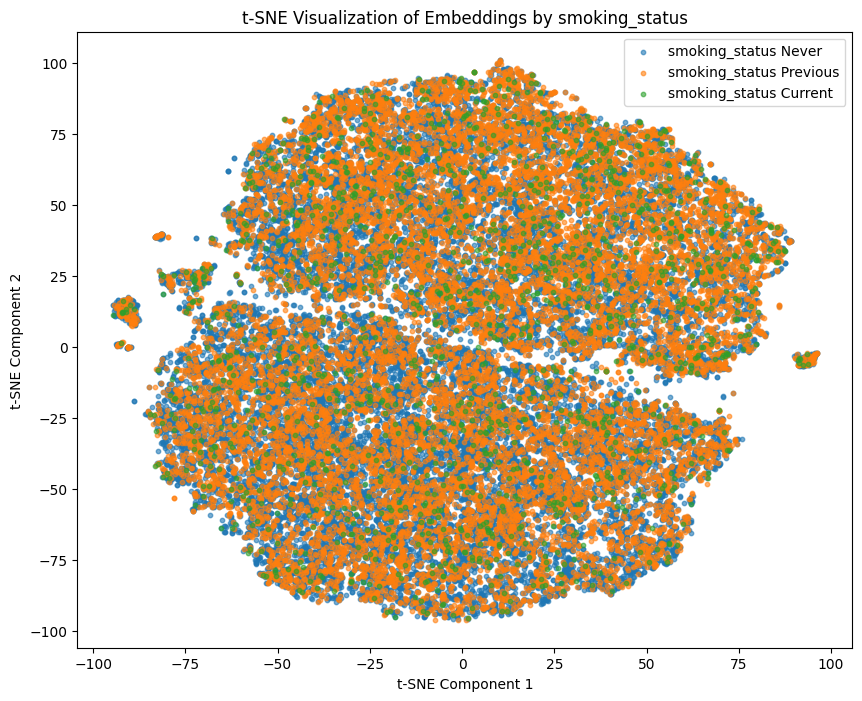

In [25]:
visualize_tsne(df_smoking, "smoking_status", vis_fraction=0.9, remove_groups=["Prefer not to answer"])

In [13]:
# Define age bins based on min and max
min_age = df_age["age"].min()
max_age = df_age["age"].max()
bins = np.linspace(min_age, max_age, 5)  # 5 equal-width groups, so 6 bin edges

# Assign age groups to a new column
df_age["age_group"] = pd.cut(df["age"], bins=bins, labels=[f"Group {i+1}" for i in range(4)], include_lowest=True)


/tmp/ipykernel_2553941/437876760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["age_group"] = pd.cut(df["age"], bins=bins, labels=[f"Group {i+1}" for i in range(4)], include_lowest=True)


In [15]:
df_age["age_group"].value_counts()

Group 3    30503
Group 2    26179
Group 4     9322
Group 1     7090
Name: age_group, dtype: int64

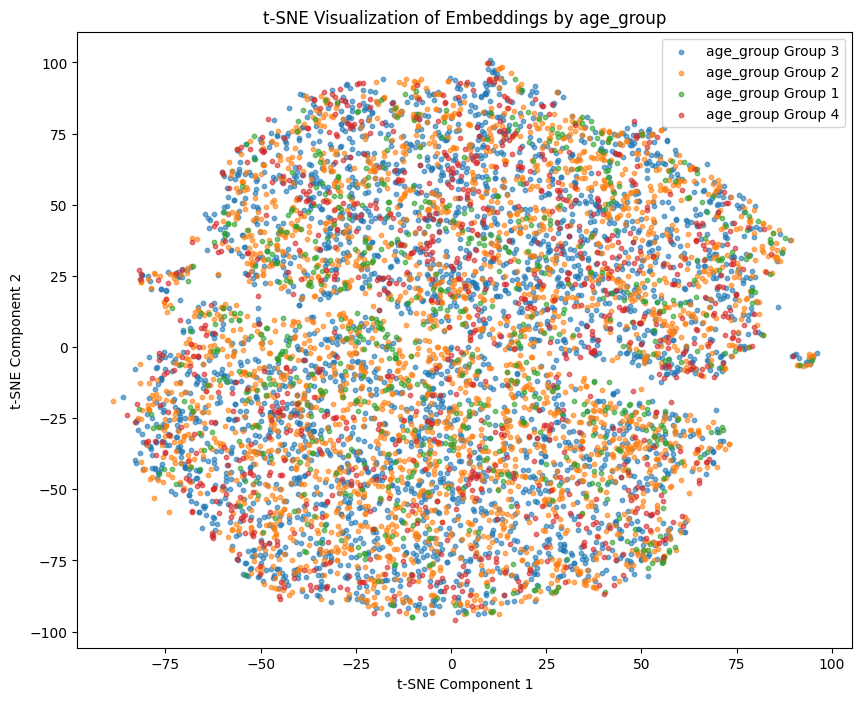

In [16]:
visualize_tsne(df_age, "age_group", vis_fraction=0.1)

In [17]:
# bmi groups <18.5 underweight, 18.5-24.9 normal, 25-29.9 overweight, 30-34.9 obese class 1, 35-39.9 obese class 2, >40 obese class 3
#df_bmi["bmi_group"] = pd.cut(df_bmi["bmi"], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese Class 1", "Obese Class 2", "Obese Class 3"], include_lowest=True)
df_bmi["bmi_group"] = pd.cut(df_bmi["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"], include_lowest=True)



/tmp/ipykernel_2553941/3695445368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi["bmi_group"] = pd.cut(df_bmi["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"], include_lowest=True)


In [19]:
# count of each bmi group
df_bmi["bmi_group"].value_counts()

Overweight     27673
Normal         25148
Obese          12970
Underweight      542
Name: bmi_group, dtype: int64

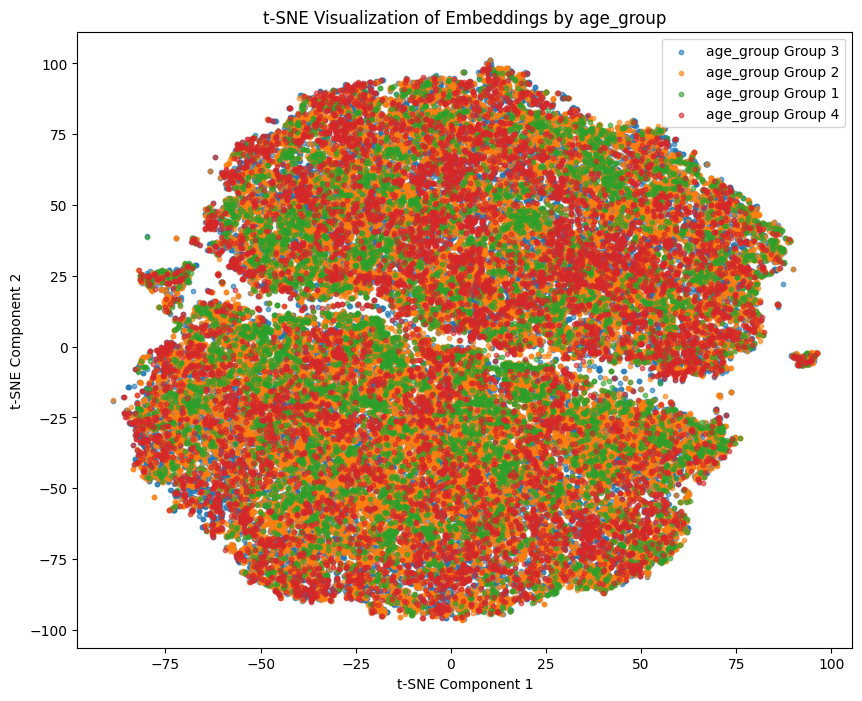

In [23]:
visualize_tsne(df_bmi, "age_group", vis_fraction=0.99)

In [55]:
age_labels = pd.read_csv("/vol/aimspace/projects/ukbb/projects/age_prediction/data_split_ageing/whole_body_healthy_ids_noselfreported_noicd10_train_clean.csv")

In [56]:
len(age_labels)

18262

In [57]:
age_labels.head()

,eid,52-0.0,34-0.0,50-2.0,21002-2.0,53-2.0,21001-2.0,31-0.0,birth_date,assessment_date,age
0,1000456,2,1947,184.0,83.0,2015-06-25,24.5156,1,1947-02-15,2015-06-25,68.4
1,1000708,7,1968,155.0,77.2,2023-05-12,32.1332,0,1968-07-15,2023-05-12,54.8
2,1000969,9,1954,185.5,93.6,2019-01-16,27.2012,1,1954-09-15,2019-01-16,64.3
3,1001358,5,1960,159.0,69.9,2022-10-22,27.6492,0,1960-05-15,2022-10-22,62.4
4,1001805,9,1948,155.0,57.4,2022-03-29,23.8918,0,1948-09-15,2022-03-29,73.5


In [50]:
# len train
len(age_labels[age_labels["split"] == "train"]), len(age_labels[age_labels["split"] == "val"]), len(age_labels[age_labels["split"] == "test"])

(25774, 6446, 8067)

In [52]:
# read npy 
import numpy as np
age_labels_train = pd.read_csv("/vol/aimspace/projects/ukbb/projects/age_prediction/data_split_ageing/whole_body_3d_healthy_noselfreported_noicd10_assessment2_train_df.csv")
age_labels_val = pd.read_csv("/vol/aimspace/projects/ukbb/projects/age_prediction/data_split_ageing/whole_body_3d_healthy_noselfreported_noicd10_assessment2_val_df.csv")
age_labels_unhealthy = pd.read_csv("/vol/aimspace/projects/ukbb/projects/age_prediction/data_split_ageing/whole_body_3d_unhealthy_selfreported_icd10_assessment2_df.csv")

In [53]:
age_labels_all = pd.concat([age_labels_train, age_labels_val, age_labels_unhealthy])

In [54]:
age_labels_all = age_labels_all.rename(columns={"eid": "eid", "age": "age", "21001-2.0": "bmi", "31-0.0": "sex"})

In [58]:
len(age_labels_all)

73094

In [59]:
age_labels_all.to_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/age_labels_all.csv", index=False)

In [56]:
# remove all other fields
age_labels_all = age_labels_all[["eid", "age", "bmi", "sex"]]


In [46]:
len(age_labels_train), len(age_labels_val), len(age_labels_unhealthy)

(2841, 712, 69541)

In [47]:
age_labels_val.head()

,eid,52-0.0,34-0.0,50-2.0,21002-2.0,53-2.0,21003-2.0,21001-2.0,31-0.0,birth_date,assessment_date,age
0,1034715,3,1966,NaN,NaN,2017-09-29,51.0,NaN,1,1966-03-15,2017-09-29,51.5
1,1035460,2,1958,159.0,52.1,2019-01-28,60.0,20.6084,0,1958-02-15,2019-01-28,61.0
2,1038051,8,1956,NaN,NaN,2018-06-18,61.0,NaN,0,1956-08-15,2018-06-18,61.8
3,1056728,3,1944,158.4,67.7,2023-09-02,79.0,26.9823,0,1944-03-15,2023-09-02,79.5
4,1062412,9,1952,155.0,66.4,2018-10-30,66.0,27.6379,0,1952-09-15,2018-10-30,66.1


In [78]:
age_labels_train["split"] = "train"
age_labels_val["split"] = "val"

In [79]:
labels_healthy_age = pd.concat([age_labels_train, age_labels_val])

labels_healthy_age.drop(columns=[ '52-0.0', '34-0.0', '50-2.0', '21002-2.0', '53-2.0', '21003-2.0',
       '21001-2.0', '31-0.0', 'birth_date', 'assessment_date'], inplace=True)


In [27]:
labels_healthy_age.to_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/labels_healthy_age.csv", index=False)

NameError: name 'labels_healthy_age' is not defined

In [71]:
len(labels_healthy_age)

3553

In [69]:
len(age_labels_train), len(age_labels_val), len(age_labels_unhealthy)

(2841, 712, 69541)

In [72]:
age_labels_healthy_all = age_labels_all.copy()

age_labels_healthy_all[age_labels_healthy_all["eid"].isin(age_labels_train["eid"])]["split"] = "train"
age_labels_healthy_all[age_labels_healthy_all["eid"].isin(age_labels_val["eid"])]["split"] = "val"
age_labels_healthy_all[age_labels_healthy_all["eid"].isin(age_labels_unhealthy["eid"])]["split"] = "test"

/tmp/ipykernel_433700/1286560316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_labels_healthy_all[age_labels_healthy_all["eid"].isin(age_labels_train["eid"])]["split"] = "train"
/tmp/ipykernel_433700/1286560316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_labels_healthy_all[age_labels_healthy_all["eid"].isin(age_labels_val["eid"])]["split"] = "val"
/tmp/ipykernel_433700/1286560316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [78]:
age_labels_healthy_all["split"] = "test"
age_labels_healthy_all.loc[age_labels_healthy_all["eid"].isin(age_labels_train["eid"]), "split"] = "train"
age_labels_healthy_all.loc[age_labels_healthy_all["eid"].isin(age_labels_val["eid"]), "split"] = "val"

In [80]:
# count of train, val, test
age_labels_healthy_all["split"].value_counts()

test     69541
train     2841
val        712
Name: split, dtype: int64

In [82]:
age_labels_healthy_all.to_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/embeddings/healthy/split.csv", index=False)

In [82]:
# list all dirs in the directory
import os
dirs = os.listdir("/vol/aimspace/projects/ukbb/data/whole_body/body_masks")

In [84]:
dirs = [int(d) for d in dirs]

In [89]:
len(dirs)

68202

In [87]:
from math import e


eids = set(dirs)
eids_healthy = set(labels_healthy_age["eid"].values)
eids_missing = eids_healthy - eids

In [91]:
eids_missing

{1007569,
 1015791,
 1016914,
 1018069,
 1033559,
 1034715,
 1038051,
 1043593,
 1045832,
 1056520,
 1057187,
 1061191,
 1062224,
 1068937,
 1077026,
 1111171,
 1115360,
 1117280,
 1132485,
 1134182,
 1139961,
 1140080,
 1150634,
 1152336,
 1152497,
 1158721,
 1159557,
 1170688,
 1186803,
 1222382,
 1235024,
 1235089,
 1235258,
 1237814,
 1242938,
 1250622,
 1251384,
 1260854,
 1278272,
 1284312,
 1290831,
 1294869,
 1296568,
 1299282,
 1301951,
 1310914,
 1316731,
 1333751,
 1358354,
 1367108,
 1378464,
 1386681,
 1405394,
 1411581,
 1415009,
 1425903,
 1447100,
 1448470,
 1450015,
 1455760,
 1462861,
 1471263,
 1473711,
 1481371,
 1484639,
 1498145,
 1501756,
 1510281,
 1534565,
 1542469,
 1551147,
 1557790,
 1563890,
 1566961,
 1569074,
 1573214,
 1575173,
 1581438,
 1585418,
 1589909,
 1596087,
 1606024,
 1606052,
 1606601,
 1613554,
 1616761,
 1624456,
 1624820,
 1641804,
 1644195,
 1650796,
 1653249,
 1661576,
 1672047,
 1680157,
 1681267,
 1706537,
 1718479,
 1727170,
 1736257,


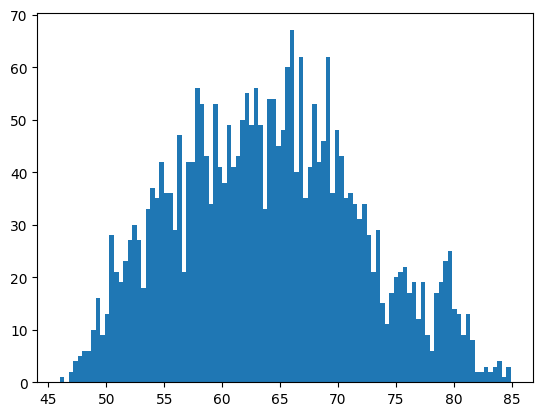

In [67]:
# age column histogram
import matplotlib.pyplot as plt
plt.hist(age_labels["age"], bins=100)
plt.show()


In [37]:
# read embeddings.npz with embeddings and idx
import numpy as np
embeddings_missing = np.load("/vol/aimspace/users/sdm/Projects/WholeBodyRL/logs/checkpoints/mae_multi_recon_0.7/21-12-2024_00-19-47/embeddings_wb_missing_eids.npz")
embeddings_wb_all = np.load("/vol/aimspace/users/sdm/Projects/WholeBodyRL/logs/checkpoints/mae_multi_recon_0.7/21-12-2024_00-19-47/embeddings_wb_all.npz")

In [33]:
# read labels
labels_missing = pd.read_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/labels.csv")
labels_missing = labels[labels["split"] == "test"]
labels_missing["eid"]
 #create new npz with 

0       3047438
1       3375129
2       1015834
3       4620321
4       1277990
         ...   
5370    3637226
5371    5308398
5372    1015791
5373    4980724
5374    4620287
Name: eid, Length: 5375, dtype: int64

In [35]:
labels_wb_all = pd.read_csv("/u/home/sdm/GitHub/WholeBodyRL/configs/data_files/labels.csv")
labels_wb_all = labels_wb_all[labels_wb_all["split"] == "test"]
labels_wb_all["eid"]

0        1000071
1        1000109
2        1000125
3        1000180
4        1000191
          ...   
68188    5526552
68189    5587559
68190    5596262
68191    5634001
68192    5753700
Name: eid, Length: 68193, dtype: int64

In [38]:
# create new npz with embeddings from both and corresponding eids without idx
embeddings_missing_new = embeddings_missing["embeddings"]
embeddings_wb_all_new = embeddings_wb_all["embeddings"]
eids_missing = labels_missing["eid"].values
eids_wb_all = labels_wb_all["eid"].values

embeddings_all = np.concatenate([embeddings_wb_all_new, embeddings_missing_new], axis=0)
eids_all = np.concatenate([eids_wb_all, eids_missing], axis=0)
np.savez("/vol/aimspace/users/sdm/Projects/WholeBodyRL/logs/checkpoints/mae_multi_recon_0.7/21-12-2024_00-19-47/embeddings_all.npz", embeddings=embeddings_all, eids=eids_all)



In [39]:
embeddings_all = np.load("/vol/aimspace/users/sdm/Projects/WholeBodyRL/logs/checkpoints/mae_multi_recon_0.7/21-12-2024_00-19-47/embeddings_all.npz")
embs = embeddings_all["embeddings"]
eids = embeddings_all["eids"]

In [41]:
embs

array([[-0.01738848, -0.01102476,  0.00736005, ..., -0.07167501,
         0.01582177,  0.01969203],
       [ 0.00469522, -0.07502501,  0.0429678 , ..., -0.03269829,
         0.05561268,  0.01637643],
       [-0.0612047 , -0.05094368, -0.02367221, ..., -0.12692675,
         0.00098379, -0.01504393],
       ...,
       [ 0.0568994 , -0.10661094,  0.03470575, ...,  0.03852844,
        -0.00142087, -0.09282698],
       [-0.03525341, -0.07101052, -0.0104915 , ...,  0.04377098,
         0.01880807,  0.01762479],
       [-0.04153501, -0.06287812, -0.07835433, ...,  0.01936063,
         0.03376094, -0.01309738]], dtype=float32)

In [42]:
embeddings_wb_all_new

array([[-0.01738848, -0.01102476,  0.00736005, ..., -0.07167501,
         0.01582177,  0.01969203],
       [ 0.00469522, -0.07502501,  0.0429678 , ..., -0.03269829,
         0.05561268,  0.01637643],
       [-0.0612047 , -0.05094368, -0.02367221, ..., -0.12692675,
         0.00098379, -0.01504393],
       ...,
       [-0.00038957, -0.06665509,  0.00680581, ...,  0.02301219,
         0.03639057, -0.10405099],
       [-0.01897783, -0.05951103, -0.01725759, ...,  0.04611255,
         0.062171  , -0.05338835],
       [-0.01503521, -0.04079645,  0.03980091, ..., -0.01836948,
        -0.00131332, -0.06460345]], dtype=float32)

In [44]:
len(embeddings_missing_new[0])

1025